## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [1]:
from sklearn.datasets import load_boston  #ÂØºÂÖ•Ê≥¢Â£´È°øÊàø‰ª∑Êï∞ÊçÆÈõÜ
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import random
import re
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

In [2]:
dataset = load_boston()
X, y = dataset['data'], dataset['target']

In [3]:
def price(rm, k, b):   #ÈöèÊú∫ÂÆö‰πâ‰∏Ä‰∏™Á∫øÊÄßÂáΩÊï∞
    """f(x) = k * x + b"""
    return k * rm + b  

In [4]:
def draw_rm_and_price():    #rm:ÊàøÈó¥Êï∞ÈáèÂíåÊàø‰ª∑ÁöÑÂÖ≥Á≥ª  X[:,5]
    plt.scatter(X[:, 5], y)

In [5]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

## First-Method: Random generation: get best k and best b

In [6]:
def random_k_b(X_data,y_data,trying_times):

    min_loss = float('inf')   #Ê≠£Êó†Á©∑
    best_k, best_b = None, None

    for i in range(trying_times):
        k = random.random() * 200 - 100  #ÂÆö‰πâk,bÂú®¬±100ÁöÑËåÉÂõ¥
        b = random.random() * 200 - 100
        price_by_random_k_and_b = [price(r, k, b) for r in X_data]    #Â¶Ç X_data = X[:, 5]Ôºå Áî®ÊàøÈó¥Êï∞ÁõÆÈ¢ÑÊµãÊàø‰ª∑

        current_loss = loss(y_data, price_by_random_k_and_b)

        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = k, b
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    return (best_k,best_b)

In [7]:
k1,b1=random_k_b(X[:,5],y,2000)

When time is : 0, get best_k: -43.74659022356651 best_b: 20.290037825163694, and the loss is: 78245.16914842492
When time is : 4, get best_k: 1.8408964019398297 best_b: 71.4315139625071, and the loss is: 3725.965314023563
When time is : 10, get best_k: 20.79914093707896 best_b: -57.75590587639785, and the loss is: 2653.82151965352
When time is : 11, get best_k: 14.042389855438884 best_b: -68.79626101001321, and the loss is: 65.09819295246767
When time is : 545, get best_k: 9.569186535087582 best_b: -35.03787697562319, and the loss is: 50.30346132438841
When time is : 1183, get best_k: 9.087448424594896 best_b: -33.700810678490754, and the loss is: 44.370969071438246


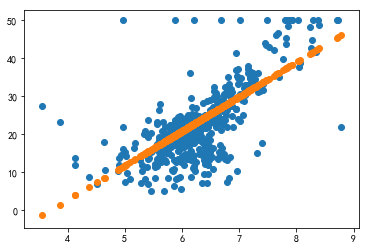

In [8]:
X_rm = X[:, 5]
price_by_random_k_and_b = [price(r1, k1, b1) for r1 in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

## Second Method.Supervised Direction to get optimal *k* and *b*

In [9]:
def supervised_direction(X_data,y_data,trying_times): #scalar=Ë∞ÉËäÇÂπÖÂ∫¶
    min_loss = float('inf')

    best_k = random.random() * 200 - 100   #‰∏ÄÂºÄÂßãÂàùÂßãÁöÑkÂíåb
    best_b = random.random() * 200 - 100

    #ÂÆö‰πâk,bÂèØ‰ª•ÂèòÂåñÁöÑÊñπÂêë
    direction = [
        (+1, -1),  # first element: k's change direction, second element: b's change direction
        (+1, +1), 
        (-1, -1), 
        (-1, +1),
    ]

    next_direction = random.choice(direction)
    

    for i in range(trying_times):
        scalar = random.random()   #ÂÆûÈôÖËøêË°åÊó∂ÈááÁî®Âõ∫ÂÆöÁöÑscalar,ÁªìÊûúÁªèÂ∏∏Ëøò‰∏çÂ¶Ç1st method,ÊâÄ‰ª•Êîπ‰∏∫ÈöèÊú∫Êï∞
        k_direction, b_direction = next_direction

        current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar

        price_by_k_and_b = [price(r, current_k, current_b) for r in X_data]

        current_loss = loss(y_data, price_by_k_and_b)

        if current_loss < min_loss: # performance became better,update min_loss and k,b,continue using the current next_direction
            min_loss = current_loss
            best_k, best_b = current_k, current_b

            next_direction = next_direction
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
        else:
            next_direction = random.choice(direction)
    return best_k,best_b

In [12]:
k2,b2=supervised_direction(X[:,5],y,2000)

When time is : 0, get best_k: -57.0199693705921 best_b: 19.59265744830332, and the loss is: 132728.05390953933
When time is : 1, get best_k: -56.869068791619554 best_b: 19.441756869330774, and the loss is: 132142.64468670846
When time is : 2, get best_k: -55.953180749486116 best_b: 18.525868827197336, and the loss is: 128617.28320182522
When time is : 3, get best_k: -55.18072548124209 best_b: 17.753413558953312, and the loss is: 125681.07601656023
When time is : 4, get best_k: -54.64441781709583 best_b: 17.217105894807048, and the loss is: 123662.44591117556
When time is : 5, get best_k: -54.55563274511563 best_b: 17.12832082282685, and the loss is: 123329.84147021477
When time is : 6, get best_k: -54.20375543646268 best_b: 16.776443514173895, and the loss is: 122016.05418667606
When time is : 7, get best_k: -53.40374215368142 best_b: 15.976430231392639, and the loss is: 119055.27316806001
When time is : 8, get best_k: -52.53815654164615 best_b: 15.11084461935737, and the loss is: 1158

When time is : 177, get best_k: 11.310777399944854 best_b: -48.73808932223362, and the loss is: 46.038917939363444
When time is : 381, get best_k: 11.314241405707168 best_b: -48.73462531647131, and the loss is: 46.0376724931585
When time is : 876, get best_k: 11.29959321448465 best_b: -48.71997712524879, and the loss is: 46.036853224125686
When time is : 1029, get best_k: 11.301409150585357 best_b: -48.721793061349494, and the loss is: 46.03629252897514
When time is : 1128, get best_k: 11.307190591816369 best_b: -48.71601162011848, and the loss is: 46.03129153557374
When time is : 1397, get best_k: 11.301841339545039 best_b: -48.71066236784715, and the loss is: 46.03106874866244
When time is : 1531, get best_k: 11.304588648105682 best_b: -48.71340967640779, and the loss is: 46.03098001292753
When time is : 1664, get best_k: 11.305321172746519 best_b: -48.712677151766954, and the loss is: 46.030453309184956
When time is : 1838, get best_k: 11.305978798918996 best_b: -48.71201952559448, 

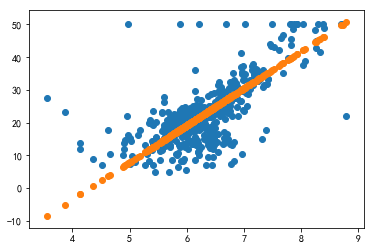

In [13]:
X_rm = X[:, 5]
price_by_supervisedDirection_k_and_b = [price(r2, k2, b2) for r2 in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_supervisedDirection_k_and_b)

## 3.Gradient Descent to get optimal *k* and *b*

$$b=b-\frac{\alpha}{n}(h_\theta(x)-y)$$
$$k=k-\frac{\alpha}{n}(h_\theta(x)-y)x_i$$

In [14]:
def h(x,k,b):
    #print(k,b)
    return k*x+b   #ÊãüÂêàÂáΩÊï∞‰∏∫ y=b+k*x

def gradient_descent(X_data,y_data,trying_times):
    min_loss=float('inf')
    #Ê≠•Èïø
    alpha = 0.001
    diff = [0,0]
    m = len(X_rm)           #ËÆ°ÁÆóÊ†∑Êú¨‰∏™Êï∞
    #ÂàùÂßãÂåñÂèÇÊï∞ÁöÑÂÄºÔºåÊãüÂêàÂáΩÊï∞‰∏∫ y=theta0+theta1*x
    b = 0
    k = 0


    for t in range(trying_times):
    #Ê¢ØÂ∫¶‰∏ãÈôç
        for i in range(m):
            diff[0]+=h(X_data[i],k,b)-y_data[i]
            diff[1]+=(h(X_data[i],k,b)-y_data[i])*X_data[i]
        b=b-alpha/m*diff[0]
        k=k-alpha/m*diff[1]

        price_by_random_k_and_b = [price(r, k, b) for r in X_data]    #Áî®ÊàøÈó¥Êï∞ÁõÆÈ¢ÑÊµãÊàø‰ª∑
        current_loss = loss(y_data, price_by_random_k_and_b)

        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = k, b
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(t, best_k, best_b, min_loss))
    return (best_k,best_b)

When time is : 0, get best_k: 0.1460950150197629 best_b: 0.0225328063241107, and the loss is: 549.3393626193774
When time is : 1, get best_k: 0.4323011936319272 best_b: 0.06665773241079415, and the loss is: 470.6688665427166
When time is : 2, get best_k: 0.8468960350299609 best_b: 0.130531952141985, and the loss is: 368.8980291581159
When time is : 3, get best_k: 1.3728987454064154 best_b: 0.21148601430088335, and the loss is: 260.5369610907961
When time is : 4, get best_k: 1.988766064953352 best_b: 0.3061332301038579, and the loss is: 163.16484689205578
When time is : 5, get best_k: 2.6692750523725026 best_b: 0.4105084514006352, and the loss is: 92.57807280279172
When time is : 6, get best_k: 3.386556652768604 best_b: 0.5202305527866821, and the loss is: 60.2275780052198
When time is : 37, get best_k: 3.444205448954485 best_b: 0.22027686539847982, and the loss is: 59.81748040173152
When time is : 68, get best_k: 3.5652206052515774 best_b: -0.4827487057880721, and the loss is: 59.07660

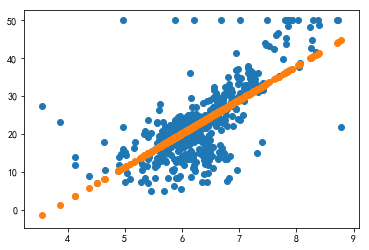

In [19]:
X_rm = X[:, 5]
k,b=gradient_descent(X_rm,y,10000)
price_gradient_descent = [price(r3, k, b) for r3 in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_gradient_descent)

## 4. Try different Loss function and learning rate. 
$Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

In [16]:
def loss2(y, y_hat): # to evaluate the performance 
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

In [17]:
def gradient_descent2(X_data,y_data,trying_times):
    min_loss=float('inf')
    #Ê≠•Èïø
    alpha = 0.001
    diff = [0,0]
    m = len(X_rm)           #ËÆ°ÁÆóÊ†∑Êú¨‰∏™Êï∞
    #ÂàùÂßãÂåñÂèÇÊï∞ÁöÑÂÄºÔºåÊãüÂêàÂáΩÊï∞‰∏∫ y=theta0+theta1*x
    b = 0
    k = 0


    for t in range(trying_times):
    #Ê¢ØÂ∫¶‰∏ãÈôç
        for i in range(m):
            diff[0]+=h(X_data[i],k,b)-y_data[i]
            diff[1]+=(h(X_data[i],k,b)-y_data[i])*X_data[i]
        b=b-alpha/m*diff[0]
        k=k-alpha/m*diff[1]

        price_by_random_k_and_b = [price(r, k, b) for r in X_data]    
        current_loss = loss2(y_data, price_by_random_k_and_b)   #‰ΩøÁî®‰∏çÂêåÁöÑlossË°®ËææÂºè

        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = k, b
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(t, best_k, best_b, min_loss))
    return (best_k,best_b)

When time is : 0, get best_k: 0.1460950150197629 best_b: 0.0225328063241107, and the loss is: 21.59211976257268
When time is : 1, get best_k: 0.4323011936319272 best_b: 0.06665773241079415, and the loss is: 19.749293644507443
When time is : 2, get best_k: 0.8468960350299609 best_b: 0.130531952141985, and the loss is: 17.079842427707522
When time is : 3, get best_k: 1.3728987454064154 best_b: 0.21148601430088335, and the loss is: 13.764940813733174
When time is : 4, get best_k: 1.988766064953352 best_b: 0.3061332301038579, and the loss is: 10.190047591163102
When time is : 5, get best_k: 2.6692750523725026 best_b: 0.4105084514006352, and the loss is: 7.141717286470722
When time is : 6, get best_k: 3.386556652768604 best_b: 0.5202305527866821, and the loss is: 5.448726549844317
When time is : 22, get best_k: 3.3928215511577697 best_b: 0.41363124425789366, and the loss is: 5.447132598836711
When time is : 37, get best_k: 3.444205448954485 best_b: 0.22027686539847982, and the loss is: 5.43

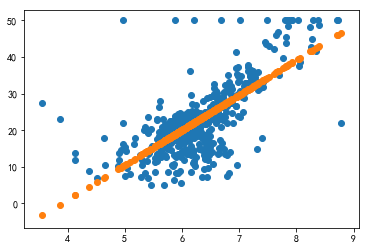

In [20]:
X_rm = X[:, 5]
k,b=gradient_descent2(X_rm,y,10000)
price_by_gradient_descent2 = [price(r4, k, b) for r4 in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_gradient_descent2)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:Âõ†‰∏∫ÂèØËÉΩÊÉÖÂÜµ‰∏çÂÅúÁöÑÂú®ÂèòÂåñÔºåÂÜçÂ§çÊùÇÁöÑÂÖ¨ÂºèÈÉΩ‰∏çÂèØËÉΩhandleÊñ∞ÁöÑÊÉÖÂÜµÔºåÊØîÂ¶ÇÂûÉÂúæÈÇÆ‰ª∂ÁöÑ‰æãÂ≠ê„ÄÇÊâÄ‰ª•Êàë‰ª¨ËÆ©Êú∫Âô®Âü∫‰∫éÊï∞ÊçÆÂéªÂ≠¶‰π†ÔºåÂèØ‰ª•‰∏çÊñ≠‰øÆÊ≠£ÂáΩÊï∞

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:Ê≤°ÊúâÊñπÂêëÊÄßÔºåÊÉ≥Ë¶ÅÂÆûÁé∞Â§ßÁöÑÁ≤æÂ∫¶ÔºåÈùûÂ∏∏ËÄóÊó∂Èó¥„ÄÇÂ¶ÇÊûúÂèÇÊï∞‰∏çÊ≠¢‰∏Ä‰∏™k,‰∏Ä‰∏™bÔºåÈÇ£ÂèòÂåñÁöÑÁ©∫Èó¥Â∞±Êõ¥Â§ß‰∫ÜÔºåÂÆûÁé∞‰∏ÄÂÆöÁöÑÁ≤æÂ∫¶Êõ¥ÊÖ¢

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:Á¨¨‰∫åÁßçÊñπÊ≥ïÂ¢ûÂä†‰∫ÜÊñπÂêëÁöÑÈÄâÊã©Ôºå‰∏ÄÂÆöÁ®ãÂ∫¶‰∏ä‰ºò‰∫éÁ¨¨‰∏ÄÁßçÊñπÊ≥ï„ÄÇ‰ΩÜÊòØÂ¶ÇÊûúÂèÇÊï∞‰∏çÊ≠¢‰∏Ä‰∏™k,ÂØπÂæàÂ§öÁöÑk1,k2,k3,k4...bÂÅörandom.choiceÔºåÂèØ‰ª•ÁªÑÂêàÁöÑchoice‰πüÈùûÂ∏∏Â§ßÔºåÂáèÂ∞è‰∫ÜÂæÄÊ≠£Á°ÆÊñπÂêëÁßªÂä®ÁöÑÂèØËÉΩÊÄß

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:Âõ†‰∏∫Ê±ÇÂØº‰ª•ÂêéÔºåË¥üÁöÑÊñúÁéáËØ¥ÊòéÂèòÂåñÁöÑÊñπÂêëÊòØÊ≠£Á°ÆÁöÑÔºåÂèØ‰ª•Ëøõ‰∏ÄÊ≠•ÂêëÁùÄËøô‰∏™ÊñπÂêë‰ºòÂåñ„ÄÇ‰ºò‰∫é2nd method supervised direction

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:Ê¢ØÂ∫¶ÊòØÊçüÂ§±ÂáΩÊï∞ÂØπÂèÇÊï∞ÁöÑÂÅèÂØºÊï∞Ôºå‰∏ãÈôç‰ª£Ë°®‰∫ÜÊòØÊåâÁÖßÊ¢ØÂ∫¶ÁöÑË¥üÊñπÂêë

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:ÂèòÂåñÁöÑÊñπÂêëÊõ¥ÊòéÁ°ÆÔºåÊØè‰∏ÄÊ¨°ÈÉΩÊúùÁùÄÊõ¥Â∞èÁöÑÊñπÂêëÊõ¥Êñ∞

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:ÈÄöËøáÂ§ßÈáèÁöÑÊï∞ÊçÆ+‰∏ÄÂÆöÁöÑËßÑÂàôÂºïÂØºÔºåËÆ©Êú∫Âô®Ëá™Â∑±Â≠¶‰π†ËæìÂÖ•‰∏éËæìÂá∫ÁöÑÂÖ≥Á≥ª

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('Â••‰Ωì‰∏≠ÂøÉ', 'Â§©ÂÆâÈó®') 
```
you need get the result: 

Â••‰Ωì‰∏≠ÂøÉ-> A -> B -> C -> ... -> Â§©ÂÆâÈó®



In [21]:
import requests
import networkx as nx
from collections import defaultdict
from bs4 import BeautifulSoup

In [22]:
url = 'http://www.bjsubway.com/station/zjgls/'  #Âåó‰∫¨Âú∞ÈìÅÂÆòÁΩë

In [23]:
response = requests.get(url)
response.encoding='GBK'

In [24]:
soup=BeautifulSoup(response.text,'lxml')

In [25]:
lines=soup.find_all('div',class_='line_place')      #ÊØè‰∏™lineÊòØ‰∏ÄÊù°Âú∞ÈìÅÁ∫øË∑ØÁöÑÁ´ôÁÇπ‰ø°ÊÅØ

In [26]:
path_lst=[]                      #Ë∑ØÂæÑÂàóË°® 
dis_dic={}                       #Á´ôÈó¥Ë∑ùÁ¶ªÁöÑÂ≠óÂÖ∏
for line in lines:
    tbodys=line.find_all('tbody')
    for tbody in tbodys:   #14Âè∑Á∫øÊúâ‰∏úË•ø‰∏§ÊÆµ
        trs=tbody.find_all('tr')
        for tr in trs:
            sub_route=tr.find('th').text
            path_lst.append(sub_route)
            dis_dic[sub_route]=tr.find('td').text
            dis_dic[sub_route.split('‚Äî‚Äî')[1]+'‚Äî‚Äî'+sub_route.split('‚Äî‚Äî')[0]]=tr.find('td').text
            
        print(path_lst[-1])  #ÊâìÂç∞ÊØèÊù°Á∫øË∑ØÊúÄÂêé‰∏Ä‰∏™Á´ôÁÇπÊü•Áúã‰ø°ÊÅØÁöÑÂÆåÊï¥ÊÄß

ÂõõÊÉ†‚Äî‚ÄîÂõõÊÉ†‰∏ú
ÁßØÊ∞¥ÊΩ≠‚Äî‚ÄîË•øÁõ¥Èó®
ËßíÈó®Ë•ø‚Äî‚ÄîÂÖ¨ÁõäË•øÊ°•
ÂàòÂÆ∂Á™ë‚Äî‚ÄîÂÆãÂÆ∂Â∫Ñ
‰∏úÂ§èÂõ≠‚Äî‚ÄîÊΩûÂüé
ÂèåÂêà‚Äî‚ÄîÁÑ¶ÂåñÂéÇ
‰ªÄÂàπÊµ∑‚Äî‚ÄîÂçóÈî£ÈºìÂ∑∑
‰∏∞Âè∞ÁßëÊäÄÂõ≠‚Äî‚ÄîÈÉ≠ÂÖ¨Â∫Ñ
ÁÅ´Âô®Ëê•‚Äî‚ÄîÂ∑¥Ê≤ü
Êü≥Ëä≥‚Äî‚Äî‰∏úÁõ¥Èó®
‰∏ÉÈáåÂ∫Ñ‚Äî‚ÄîË•øÂ±Ä
Êù•ÂπøËê•‚Äî‚ÄîÂñÑÂêÑÂ∫Ñ
È°∫‰πâ‚Äî‚Äî‰ø∏‰ºØ
‰∏¥Ê≤≥Èáå‚Äî‚ÄîÂúüÊ°•
ÁîüÂëΩÁßëÂ≠¶Âõ≠‚Äî‚ÄîË•ø‰∫åÊóó
Ê¨°Ê∏†Âçó‚Äî‚ÄîÊ¨°Ê∏†
ÁîüÁâ©ÂåªËçØÂü∫Âú∞‚Äî‚ÄîÂ§©ÂÆ´Èô¢
ËâØ‰π°ÂçóÂÖ≥‚Äî‚ÄîËãèÂ∫Ñ
T2Ëà™Á´ôÊ•º‚Äî‚Äî‰∏âÂÖÉÊ°•


In [27]:
station_connection=defaultdict(list)    #ÂæóÂà∞Á´ôÁÇπÂÖ≥Á≥ªÁöÑÂ≠óÂÖ∏    
for path in path_lst:
    station_connection[path.split('‚Äî‚Äî')[0]].append(path.split('‚Äî‚Äî')[1])
    station_connection[path.split('‚Äî‚Äî')[1]].append(path.split('‚Äî‚Äî')[0])
station_connection

defaultdict(list,
            {'ËãπÊûúÂõ≠': ['Âè§Âüé'],
             'Âè§Âüé': ['ËãπÊûúÂõ≠', 'ÂÖ´ËßíÊ∏∏‰πêÂõ≠'],
             'ÂÖ´ËßíÊ∏∏‰πêÂõ≠': ['Âè§Âüé', 'ÂÖ´ÂÆùÂ±±'],
             'ÂÖ´ÂÆùÂ±±': ['ÂÖ´ËßíÊ∏∏‰πêÂõ≠', 'ÁéâÊ≥âË∑Ø'],
             'ÁéâÊ≥âË∑Ø': ['ÂÖ´ÂÆùÂ±±', '‰∫îÊ£µÊùæ'],
             '‰∫îÊ£µÊùæ': ['ÁéâÊ≥âË∑Ø', '‰∏áÂØøË∑Ø'],
             '‰∏áÂØøË∑Ø': ['‰∫îÊ£µÊùæ', 'ÂÖ¨‰∏ªÂùü'],
             'ÂÖ¨‰∏ªÂùü': ['‰∏áÂØøË∑Ø', 'ÂÜõ‰∫ãÂçöÁâ©È¶Ü', 'Ëé≤Ëä±Ê°•', 'Ë•øÈíìÈ±ºÂè∞'],
             'ÂÜõ‰∫ãÂçöÁâ©È¶Ü': ['ÂÖ¨‰∏ªÂùü', 'Êú®Ê®®Âú∞', 'ÁôΩÂ†ÜÂ≠ê', 'Âåó‰∫¨Ë•øÁ´ô'],
             'Êú®Ê®®Âú∞': ['ÂÜõ‰∫ãÂçöÁâ©È¶Ü', 'ÂçóÁ§ºÂ£´Ë∑Ø'],
             'ÂçóÁ§ºÂ£´Ë∑Ø': ['Êú®Ê®®Âú∞', 'Â§çÂÖ¥Èó®'],
             'Â§çÂÖ¥Èó®': ['ÂçóÁ§ºÂ£´Ë∑Ø', 'Ë•øÂçï', 'ÈòúÊàêÈó®', 'ÈïøÊ§øË°ó'],
             'Ë•øÂçï': ['Â§çÂÖ¥Èó®', 'Â§©ÂÆâÈó®Ë•ø', 'ÁÅµÂ¢ÉËÉ°Âêå', 'ÂÆ£Ê≠¶Èó®'],
             'Â§©ÂÆâÈó®Ë•ø': ['Ë•øÂçï', 'Â§©ÂÆâÈó®‰∏ú'],
             'Â§©ÂÆâÈó®‰∏ú': ['Â§©ÂÆâÈó®Ë•ø', 'ÁéãÂ∫ú‰∫ï'],
             'ÁéãÂ∫ú‰∫ï': ['Â§

In [28]:
station_line = defaultdict(list)  #ÊØèÊù°Á∫øË∑ØÂåÖÂê´ÁöÑÁ´ôÁÇπÂàóË°®ÁªÑÊàêÁöÑÂ≠óÂÖ∏  
for line in lines:
    line_name=line.find('td').text
    line_name=re.match(r'([\w\d]+Á∫ø)',line_name).group(1)
    trs=line.find('tbody').find_all('tr')
    #print(line_name)

    for tr in trs:
        station_line[line_name].append(tr.find("th").text.split('‚Äî‚Äî')[0])  #ÊØèÊù°Á∫øË∑ØÊ∑ªÂä†ÊâÄÊúâÁöÑÁ´ôÁÇπ
    station_line[line_name].append(trs[-1].find("th").text.split('‚Äî‚Äî')[1])
    
print(station_line.keys())

dict_keys(['1Âè∑Á∫ø', '2Âè∑Á∫ø', '4Âè∑Á∫ø', '5Âè∑Á∫ø', '6Âè∑Á∫ø', '7Âè∑Á∫ø', '8Âè∑Á∫ø', '9Âè∑Á∫ø', '10Âè∑Á∫ø', '13Âè∑Á∫ø', '14Âè∑Á∫ø', '15Âè∑Á∫ø', 'ÂÖ´ÈÄöÁ∫ø', 'ÊòåÂπ≥Á∫ø', '‰∫¶Â∫ÑÁ∫ø', 'Â§ßÂÖ¥Á∫ø', 'ÊàøÂ±±Á∫ø', 'Êú∫Âú∫Á∫ø'])


In [29]:
##14Âè∑Á∫øÊúâ‰∏úË•ø‰∏§ÊÆµ,ÈúÄË¶Å‰Ωú‰∏Ä‰∫õ‰øÆÊîπ
station_line['14Âè∑Á∫øË•øÊÆµ']=station_line.pop('14Âè∑Á∫ø')
print(station_line.keys())

dict_keys(['1Âè∑Á∫ø', '2Âè∑Á∫ø', '4Âè∑Á∫ø', '5Âè∑Á∫ø', '6Âè∑Á∫ø', '7Âè∑Á∫ø', '8Âè∑Á∫ø', '9Âè∑Á∫ø', '10Âè∑Á∫ø', '13Âè∑Á∫ø', '15Âè∑Á∫ø', 'ÂÖ´ÈÄöÁ∫ø', 'ÊòåÂπ≥Á∫ø', '‰∫¶Â∫ÑÁ∫ø', 'Â§ßÂÖ¥Á∫ø', 'ÊàøÂ±±Á∫ø', 'Êú∫Âú∫Á∫ø', '14Âè∑Á∫øË•øÊÆµ'])


In [30]:
station_line['14Âè∑Á∫ø‰∏úÊÆµ']=[]
line14_tbodys=lines[10].find_all('tbody')     #Ê∑ªÂä†14Âè∑Á∫ø‰∏úÊÆµÁöÑ‰ø°ÊÅØ
line14_east=line14_tbodys[1].find_all('tr')
line14_lst=[]
for tr in line14_east:
    line14_lst.append(tr.find("th").text)

print(line14_lst)

for line14_east_station in line14_lst:
    station_line['14Âè∑Á∫ø‰∏úÊÆµ'].append(line14_east_station.split('‚Äî‚Äî')[0])
station_line['14Âè∑Á∫ø‰∏úÊÆµ'].append(line14_east_station.split('‚Äî‚Äî')[1])

len(station_line['14Âè∑Á∫ø‰∏úÊÆµ'])

['Âåó‰∫¨ÂçóÁ´ô‚Äî‚ÄîÈô∂ÁÑ∂Ê°•', 'Èô∂ÁÑ∂Ê°•‚Äî‚ÄîÊ∞∏ÂÆöÈó®Â§ñ', 'Ê∞∏ÂÆöÈó®Â§ñ‚Äî‚ÄîÊôØÊ≥∞', 'ÊôØÊ≥∞‚Äî‚ÄîËí≤ÈªÑÊ¶Ü', 'Ëí≤ÈªÑÊ¶Ü‚Äî‚ÄîÊñπÂ∫Ñ', 'ÊñπÂ∫Ñ‚Äî‚ÄîÂçÅÈáåÊ≤≥', 'ÂçÅÈáåÊ≤≥‚Äî‚ÄîÂçóÂÖ´ÈáåÂ∫Ñ', 'ÂçóÂÖ´ÈáåÂ∫Ñ‚Äî‚ÄîÂåóÂ∑•Â§ßË•øÈó®', 'ÂåóÂ∑•Â§ßË•øÈó®‚Äî‚ÄîÂπ≥‰πêÂõ≠', 'Âπ≥‰πêÂõ≠‚Äî‚Äî‰πùÈæôÂ±±', '‰πùÈæôÂ±±‚Äî‚ÄîÂ§ßÊúõË∑Ø', 'Â§ßÊúõË∑Ø‚Äî‚ÄîÁ∫¢Â∫ô', 'Á∫¢Â∫ô‚Äî‚ÄîÈáëÂè∞Ë∑Ø', 'ÈáëÂè∞Ë∑Ø‚Äî‚ÄîÊúùÈò≥ÂÖ¨Âõ≠', 'ÊúùÈò≥ÂÖ¨Âõ≠‚Äî‚ÄîÊû£Ëê•', 'Êû£Ëê•‚Äî‚Äî‰∏úÈ£éÂåóÊ°•', '‰∏úÈ£éÂåóÊ°•‚Äî‚ÄîÂ∞ÜÂè∞', 'Â∞ÜÂè∞‚Äî‚ÄîÈ´òÂÆ∂Âõ≠', 'È´òÂÆ∂Âõ≠‚Äî‚ÄîÊúõ‰∫¨Âçó', 'Êúõ‰∫¨Âçó‚Äî‚ÄîÈòúÈÄö', 'ÈòúÈÄö‚Äî‚ÄîÊúõ‰∫¨', 'Êúõ‰∫¨‚Äî‚Äî‰∏úÊπñÊ∏†', '‰∏úÊπñÊ∏†‚Äî‚ÄîÊù•ÂπøËê•', 'Êù•ÂπøËê•‚Äî‚ÄîÂñÑÂêÑÂ∫Ñ']


25

C:\Users\yuan-he\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


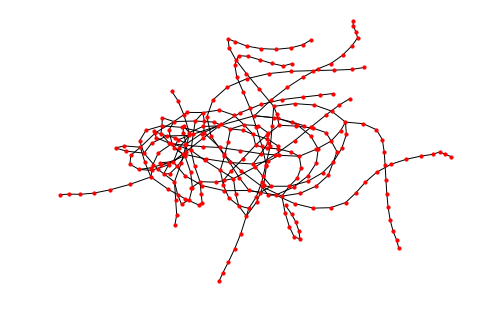

In [31]:
stations=station_connection.keys()               #ÂèØËßÜÂåñÁ´ôÁÇπËøûÊé•‰ø°ÊÅØ
station_graph = nx.Graph()
station_graph.add_nodes_from(stations)
nx.draw(nx.Graph(station_connection), node_size=10)

## Build the search agent

In [32]:
#Build the search agent
def search(start,destination,connection_graph):
    pathes=[[start]] #ÊääÊâÄÊúâÁöÑÂú∞ÈìÅÁ´ôÁÇπÊîæËøõ‰∏Ä‰∏™ÂµåÂ•óÂàóË°®
    visited=set()
    
    n=0
    while pathes: #Âè™Ë¶ÅËøòÊúâË∑ØÂ∞±ÁªßÁª≠Êâ©Â±ï
        path = pathes.pop(0)   #ÊääÊúÄÊó©ËßÅËøáÂú∞ÈìÅÁ´ôÊãøÂá∫Êù•(ÊúÄÊó©Êâ©Â±ïÁöÑÁ´ôËäÇÁÇπÊúÄÂ∞ë),pathÊòØ‰∏Ä‰∏™ÂàóË°®Ôºå‰ª£Ë°®‰∏Ä‰∏™Ë∑ØÂæÑ
        frontier = path[-1]   #frontierÊòØËøôÊù°Ë∑ØÂæÑÊúÄÂêé‰∏Ä‰∏™Á´ôÁÇπ
        
        if frontier in visited:continue    #Â¶ÇÊûúÈÅáÂà∞ËøáËøô‰∏™Á´ôÁÇπÔºåÂ∞±Ë∑≥Ëøá
        successors=connection_graph[frontier]  #Â¶ÇÊûúÊ≤°ÊúâÔºåÂ∞±Êää‰ªñÁöÑÂÖ≥ËÅîÂú∞ÈìÅÁ´ôÁÇπÂä†ËøõÊù•
        
        
        #print('Á¨¨%iÊ¨°whileÂæ™ÁéØÔºöpath,fontier,successors'%n,path,frontier,successors)
        for station in successors:
            if station in path:continue #eliminate ÈáçÂ§çË∑ØÂæÑ
            new_path = path + [station]   #new_path ÊòØ‰∏Ä‰∏™ÂàóË°®
            pathes.append(new_path)    #pathesÊòØ‰∏Ä‰∏™Ë∑ØÂæÑÂàóË°®ÂµåÂ•óÂàóË°® e.g.[['ÂÖ∞Â∑û', 'Ë•øÂÆâ', 'ÈÉëÂ∑û'], ['ÂÖ∞Â∑û', 'Ë•øÂÆâ', 'ÈïøÊ≤ô']]
            
            
            if station == destination:return new_path
        visited.add(frontier)
        #print('Á¨¨%iÊ¨°Âæ™ÁéØafter for loop,new_path,pathesÔºåvisited'%n,new_path,pathes,visited)
        #print('-----')
        
        n=n+1

In [33]:
def pretty_print(cities):
    print('üöó->'.join(cities))

In [34]:
pretty_print(search('ÂÆ£Ê≠¶Èó®','Ê°•Êπæ',station_connection))

ÂÆ£Ê≠¶Èó®üöó->ËèúÂ∏ÇÂè£üöó->ËôéÂùäÊ°•üöó->Áè†Â∏ÇÂè£üöó->Ê°•Êπæ


## ÔºàOptionalÔºâCreate different policies for transfer system.

‰ª•‰∏ãÈÉ®Èó®‰∏∫ÂèØÈÄâÈÉ®ÂàÜÔºåËØ∑ÈÖåÊÉÖÂÆåÊàê„ÄÇ Âπ∂‰∏çË¶ÅÊ±ÇÂÖ®ÈÉ®ÂêåÂ≠¶ÂÆåÊàê„ÄÇ

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path PriorityÔºàË∑ØÁ®ãÊúÄÁü≠‰ºòÂÖàÔºâ, Minimum Transfer Priority(ÊúÄÂ∞ëÊç¢‰πò‰ºòÂÖà), Comprehensive Priority(ÁªºÂêà‰ºòÂÖà)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, ‚Ä¶ .., C, ‚Ä¶. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A ‚Ä¶ C ‚Ä¶ E ‚Ä¶ D ‚Ä¶ B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

## Define different policies for transfer system

In [35]:
#Define different policies for transfer system
station_line_info=defaultdict(list)   #Á´ôÁÇπÊâÄÂú®Á∫øË∑ØÁöÑÂ≠óÂÖ∏
for line, stations in station_line.items():
    for station in stations:
        station_line_info[station].append(line)
station_line_info

defaultdict(list,
            {'ËãπÊûúÂõ≠': ['1Âè∑Á∫ø'],
             'Âè§Âüé': ['1Âè∑Á∫ø'],
             'ÂÖ´ËßíÊ∏∏‰πêÂõ≠': ['1Âè∑Á∫ø'],
             'ÂÖ´ÂÆùÂ±±': ['1Âè∑Á∫ø'],
             'ÁéâÊ≥âË∑Ø': ['1Âè∑Á∫ø'],
             '‰∫îÊ£µÊùæ': ['1Âè∑Á∫ø'],
             '‰∏áÂØøË∑Ø': ['1Âè∑Á∫ø'],
             'ÂÖ¨‰∏ªÂùü': ['1Âè∑Á∫ø', '10Âè∑Á∫ø'],
             'ÂÜõ‰∫ãÂçöÁâ©È¶Ü': ['1Âè∑Á∫ø', '9Âè∑Á∫ø'],
             'Êú®Ê®®Âú∞': ['1Âè∑Á∫ø'],
             'ÂçóÁ§ºÂ£´Ë∑Ø': ['1Âè∑Á∫ø'],
             'Â§çÂÖ¥Èó®': ['1Âè∑Á∫ø', '2Âè∑Á∫ø'],
             'Ë•øÂçï': ['1Âè∑Á∫ø', '4Âè∑Á∫ø'],
             'Â§©ÂÆâÈó®Ë•ø': ['1Âè∑Á∫ø'],
             'Â§©ÂÆâÈó®‰∏ú': ['1Âè∑Á∫ø'],
             'ÁéãÂ∫ú‰∫ï': ['1Âè∑Á∫ø'],
             '‰∏úÂçï': ['1Âè∑Á∫ø', '5Âè∑Á∫ø'],
             'Âª∫ÂõΩÈó®': ['1Âè∑Á∫ø', '2Âè∑Á∫ø'],
             'Ê∞∏ÂÆâÈáå': ['1Âè∑Á∫ø'],
             'ÂõΩË¥∏': ['1Âè∑Á∫ø', '10Âè∑Á∫ø'],
             'Â§ßÊúõË∑Ø': ['1Âè∑Á∫ø', '14Âè∑Á∫ø‰∏úÊÆµ'],
             'ÂõõÊÉ†': ['1Âè∑Á∫ø', 'ÂÖ´ÈÄöÁ∫ø'],
        

In [36]:
def get_transfer_counts(path):     #ËÆ°ÁÆóËΩ¨Á∫øÊ¨°Êï∞
    count=0
    pre_line=station_line_info[path[0]]     #initialize previous station
    #print(pre_line)
    
    for i in range(1,len(path)): #compare line with previous line
        if all (line not in pre_line for line in station_line_info[path[i]]): 
            count+=1  #ÈÅçÂéÜÂΩìÂâçËΩ¶Á´ôÊâÄÂú®Á∫øË∑ØÔºåËã•ÊâÄÊúâÂèØËÉΩÁ∫øË∑ØÈÉΩ‰∏çÂ≠òÂú®pre-sta‰∏≠ÔºåÂàôÂøÖÈ°ªÊç¢Á∫ø
            pre_line=station_line_info[path[i]] #Êõ¥Êñ∞Ââç‰∏ÄÁ´ôÁöÑÁ∫øË∑ØÂàóË°®‰∏∫ÂΩìÂâçËΩ¶Á´ôÊâÄÂú®Á∫øË∑Ø
        else:
             pre_line=list(set(station_line_info[path[i]]) & set(pre_line))  #‰ªÖÊõ¥Êñ∞ÂàóË°®‰∏∫ÂΩìÂâçÁ´ôÂíå‰∏ä‰∏ÄÊ¨°ÁöÑ‰∫§ÈõÜ   
        #print(pre_line)
    #print(count)
    return count

In [146]:
get_transfer_counts(['Âª∫ÂõΩÈó®','Ê∞∏ÂÆâÈáå','ÂõΩË¥∏','Â§ßÊúõË∑Ø','ÂõõÊÉ†','ÂõõÊÉ†‰∏ú'])

0

In [37]:
def get_path_distance(path):  #ËÆ°ÁÆóË∑ùÁ¶ª
    distance = 0
    for i in range(1,len(path)):
        distance += int(dis_dic[path[i-1]+'‚Äî‚Äî'+path[i]])
    #print(distance)        
    return distance

get_path_distance(['Â§çÂÖ¥Èó®','Ë•øÂçï','ÂÆ£Ê≠¶Èó®','ËèúÂ∏ÇÂè£'])

3557

In [38]:
def Comprehensive_order(path):   #ÁªºÂêàËÄÉÈáèÔºåÊó∂ÈÄüÊåâ35KM/HÔºåÊØèÊ¨°Êç¢‰πò+8ÂàÜÈíüËÄÉËôëÔºå(ÁªºÂêà‰ºòÂÖà)
    time_for_travel=get_path_distance(path)/35/1000*60  #time in minutes
    time_for_interchange=get_transfer_counts(path)*8    #time in minutes
    #print(str(time_for_travel+time_for_interchange) + 'mins')
    return time_for_travel+time_for_interchange

In [39]:
def search_with_strategy(start, destination, connection_grpah, strategy):   #‰ª¨ÂèØ‰ª•Âä†‰∏Ä‰∏™ÊéíÂ∫èÂáΩÊï∞ ÂØπÊàë‰ª¨ÁöÑÊêúÁ¥¢Á≠ñÁï•ËøõË°åÊéßÂà∂
    pathes = [[start]]
    complete_pathes=[]
    visited = set()
    
    while pathes: # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        
        if froninter in visited: continue
            
        successors = connection_grpah[froninter]
        #print('1',successors)
        for city in successors:
            if city in path: continue  # eliminate loop
                
            new_path = path + [city]
            
            pathes.append(new_path)
            
            if city == destination: 
                complete_pathes.append(new_path)
                #print(new_path)
        #print('2',pathes)
        visited.add(froninter)
        #print('3',visited)
        #print('4',complete_pathes)
    complete_pathes.sort(key=strategy)
    print(complete_pathes)
    return complete_pathes[0]

In [40]:
# Minimum Transfer Priority(ÊúÄÂ∞ëÊç¢‰πò‰ºòÂÖà)
#print(len((search_with_strategy('Ë•øÂ±Ä','Âä≤Êùæ',station_connection,get_transfer_counts))))
pretty_print(search_with_strategy('ÂÖ≠ÈáåÊ°•','ÂçÅÈáåÊ≤≥',station_connection,get_transfer_counts))

[['ÂÖ≠ÈáåÊ°•', 'Ë•øÂ±Ä', 'Ê≥•Ê¥º', '‰∏∞Âè∞Á´ô', 'È¶ñÁªèË¥∏', 'Á∫™ÂÆ∂Â∫ô', 'ËçâÊ°•', 'ËßíÈó®Ë•ø', 'ËßíÈó®‰∏ú', 'Â§ßÁ∫¢Èó®', 'Áü≥Ê¶¥Â∫Ñ', 'ÂÆãÂÆ∂Â∫Ñ', 'ÊàêÂØøÂØ∫', 'ÂàÜÈíüÂØ∫', 'ÂçÅÈáåÊ≤≥'], ['ÂÖ≠ÈáåÊ°•', 'ÂÖ≠ÈáåÊ°•‰∏ú', 'Âåó‰∫¨Ë•øÁ´ô', 'ÊπæÂ≠ê', 'ËææÂÆòËê•', 'ÂπøÂÆâÈó®ÂÜÖ', 'ËèúÂ∏ÇÂè£', 'Èô∂ÁÑ∂‰∫≠', 'Âåó‰∫¨ÂçóÁ´ô', 'Èô∂ÁÑ∂Ê°•', 'Ê∞∏ÂÆöÈó®Â§ñ', 'ÊôØÊ≥∞', 'Ëí≤ÈªÑÊ¶Ü', 'ÊñπÂ∫Ñ', 'ÂçÅÈáåÊ≤≥']]
ÂÖ≠ÈáåÊ°•üöó->Ë•øÂ±Äüöó->Ê≥•Ê¥ºüöó->‰∏∞Âè∞Á´ôüöó->È¶ñÁªèË¥∏üöó->Á∫™ÂÆ∂Â∫ôüöó->ËçâÊ°•üöó->ËßíÈó®Ë•øüöó->ËßíÈó®‰∏úüöó->Â§ßÁ∫¢Èó®üöó->Áü≥Ê¶¥Â∫Ñüöó->ÂÆãÂÆ∂Â∫Ñüöó->ÊàêÂØøÂØ∫üöó->ÂàÜÈíüÂØ∫üöó->ÂçÅÈáåÊ≤≥


In [41]:
#Shortest Path PriorityÔºàË∑ØÁ®ãÊúÄÁü≠‰ºòÂÖàÔºâ
#print(len(search_with_strategy('Ë•øÂ±Ä','Âä≤Êùæ',station_connection, get_path_distance)))
pretty_print(search_with_strategy('ÂÖ≠ÈáåÊ°•','ÂçÅÈáåÊ≤≥',station_connection, get_path_distance))

[['ÂÖ≠ÈáåÊ°•', 'ÂÖ≠ÈáåÊ°•‰∏ú', 'Âåó‰∫¨Ë•øÁ´ô', 'ÊπæÂ≠ê', 'ËææÂÆòËê•', 'ÂπøÂÆâÈó®ÂÜÖ', 'ËèúÂ∏ÇÂè£', 'Èô∂ÁÑ∂‰∫≠', 'Âåó‰∫¨ÂçóÁ´ô', 'Èô∂ÁÑ∂Ê°•', 'Ê∞∏ÂÆöÈó®Â§ñ', 'ÊôØÊ≥∞', 'Ëí≤ÈªÑÊ¶Ü', 'ÊñπÂ∫Ñ', 'ÂçÅÈáåÊ≤≥'], ['ÂÖ≠ÈáåÊ°•', 'Ë•øÂ±Ä', 'Ê≥•Ê¥º', '‰∏∞Âè∞Á´ô', 'È¶ñÁªèË¥∏', 'Á∫™ÂÆ∂Â∫ô', 'ËçâÊ°•', 'ËßíÈó®Ë•ø', 'ËßíÈó®‰∏ú', 'Â§ßÁ∫¢Èó®', 'Áü≥Ê¶¥Â∫Ñ', 'ÂÆãÂÆ∂Â∫Ñ', 'ÊàêÂØøÂØ∫', 'ÂàÜÈíüÂØ∫', 'ÂçÅÈáåÊ≤≥']]
ÂÖ≠ÈáåÊ°•üöó->ÂÖ≠ÈáåÊ°•‰∏úüöó->Âåó‰∫¨Ë•øÁ´ôüöó->ÊπæÂ≠êüöó->ËææÂÆòËê•üöó->ÂπøÂÆâÈó®ÂÜÖüöó->ËèúÂ∏ÇÂè£üöó->Èô∂ÁÑ∂‰∫≠üöó->Âåó‰∫¨ÂçóÁ´ôüöó->Èô∂ÁÑ∂Ê°•üöó->Ê∞∏ÂÆöÈó®Â§ñüöó->ÊôØÊ≥∞üöó->Ëí≤ÈªÑÊ¶Üüöó->ÊñπÂ∫Ñüöó->ÂçÅÈáåÊ≤≥


In [42]:
#Comprehensive Priority(ÁªºÂêà‰ºòÂÖà)
pretty_print(search_with_strategy('ÂÖ≠ÈáåÊ°•','ÂçÅÈáåÊ≤≥',station_connection, Comprehensive_order))

[['ÂÖ≠ÈáåÊ°•', 'Ë•øÂ±Ä', 'Ê≥•Ê¥º', '‰∏∞Âè∞Á´ô', 'È¶ñÁªèË¥∏', 'Á∫™ÂÆ∂Â∫ô', 'ËçâÊ°•', 'ËßíÈó®Ë•ø', 'ËßíÈó®‰∏ú', 'Â§ßÁ∫¢Èó®', 'Áü≥Ê¶¥Â∫Ñ', 'ÂÆãÂÆ∂Â∫Ñ', 'ÊàêÂØøÂØ∫', 'ÂàÜÈíüÂØ∫', 'ÂçÅÈáåÊ≤≥'], ['ÂÖ≠ÈáåÊ°•', 'ÂÖ≠ÈáåÊ°•‰∏ú', 'Âåó‰∫¨Ë•øÁ´ô', 'ÊπæÂ≠ê', 'ËææÂÆòËê•', 'ÂπøÂÆâÈó®ÂÜÖ', 'ËèúÂ∏ÇÂè£', 'Èô∂ÁÑ∂‰∫≠', 'Âåó‰∫¨ÂçóÁ´ô', 'Èô∂ÁÑ∂Ê°•', 'Ê∞∏ÂÆöÈó®Â§ñ', 'ÊôØÊ≥∞', 'Ëí≤ÈªÑÊ¶Ü', 'ÊñπÂ∫Ñ', 'ÂçÅÈáåÊ≤≥']]
ÂÖ≠ÈáåÊ°•üöó->Ë•øÂ±Äüöó->Ê≥•Ê¥ºüöó->‰∏∞Âè∞Á´ôüöó->È¶ñÁªèË¥∏üöó->Á∫™ÂÆ∂Â∫ôüöó->ËçâÊ°•üöó->ËßíÈó®Ë•øüöó->ËßíÈó®‰∏úüöó->Â§ßÁ∫¢Èó®üöó->Áü≥Ê¶¥Â∫Ñüöó->ÂÆãÂÆ∂Â∫Ñüöó->ÊàêÂØøÂØ∫üöó->ÂàÜÈíüÂØ∫üöó->ÂçÅÈáåÊ≤≥


## Implement Continuous transfer.

In [43]:
def search_with_byway(start, destination, connection_graph, by_way):   
    sub_route=[]
    while by_way:
        begin=search(start,by_way[0],connection_graph)
        #print(begin)
        if len(by_way)>1:end=search(by_way[0],by_way[1],connection_graph)
        else:end=search(by_way[0],destination,connection_graph)
        #print(end)
        #print(begin+end[1:])
        sub_route.extend(begin+end[1:])
        by_way.pop(0)
    return sub_route

In [156]:
pretty_print(search_with_byway('ÂÖ≠ÈáåÊ°•','ÂçÅÈáåÊ≤≥',station_connection, ['Âåó‰∫¨ÂçóÁ´ô','Á£ÅÂô®Âè£']))

ÂÖ≠ÈáåÊ°•üöó->ÂÖ≠ÈáåÊ°•‰∏úüöó->Âåó‰∫¨Ë•øÁ´ôüöó->ÊπæÂ≠êüöó->ËææÂÆòËê•üöó->ÂπøÂÆâÈó®ÂÜÖüöó->ËèúÂ∏ÇÂè£üöó->Èô∂ÁÑ∂‰∫≠üöó->Âåó‰∫¨ÂçóÁ´ôüöó->Èô∂ÁÑ∂‰∫≠üöó->ËèúÂ∏ÇÂè£üöó->ËôéÂùäÊ°•üöó->Áè†Â∏ÇÂè£üöó->Ê°•Êπæüöó->Á£ÅÂô®Âè£üöó->ÂÖ≠ÈáåÊ°•üöó->ÂÖ≠ÈáåÊ°•‰∏úüöó->Âåó‰∫¨Ë•øÁ´ôüöó->ÊπæÂ≠êüöó->ËææÂÆòËê•üöó->ÂπøÂÆâÈó®ÂÜÖüöó->ËèúÂ∏ÇÂè£üöó->ËôéÂùäÊ°•üöó->Áè†Â∏ÇÂè£üöó->Ê°•Êπæüöó->Á£ÅÂô®Âè£üöó->Â§©Âùõ‰∏úÈó®üöó->Ëí≤ÈªÑÊ¶Üüöó->ÊñπÂ∫Ñüöó->ÂçÅÈáåÊ≤≥


In [44]:
len(search_with_byway('ÂÖ≠ÈáåÊ°•','ÂçÅÈáåÊ≤≥',station_connection, ['Âåó‰∫¨ÂçóÁ´ô','Á£ÅÂô®Âè£']))

30

##### 5.	Test your result with commercial applications. 

Â∞Ü‰Ω†ÁöÑÁªìÊûúÂíåÈ´òÂæ∑Âú∞ÂõæÊàñËÄÖÁôæÂ∫¶Âú∞ÂõæËøõË°åÊØîËæÉÔºåÂ¶ÇÊûúÊúâ‰∏çÂêåÔºåËØ∑ÂàÜÊûêÂéüÂõ†


ÊÅ≠ÂñúÔºåÂÆåÊàêÊú¨Ê¨°ËØæÁ®ãÔºå‰Ω†ÂØπÂ∏∏Áî®ÁöÑ‰∫∫Â∑•Êô∫ËÉΩÊñπÊ≥ï‰ª•ÂèäÊúâ‰∏ÄÂÆöÁöÑ‰∫ÜËß£‰∫Ü„ÄÇÂü∫‰∫éËßÑÂàôÁöÑÔºåÂü∫‰∫éÊ¶ÇÁéáÊ®°ÂûãÁöÑÔºåÂü∫‰∫éÊêúÁ¥¢ÁöÑÔºåÂü∫‰∫éÊú∫Âô®Â≠¶‰π†ÁöÑ„ÄÇ ÂèØ‰ª•ËØ¥ÔºåÊàë‰ª¨Áé∞Âú®ÈÄöÂ∏∏ËßÅÂà∞ÁöÑÊñπÊ≥ïÈÉΩËÉΩÂ§üÂΩíÂ±ûÂà∞ËøôÂá†Á±ªÊñπÊ≥ï‰∏≠„ÄÇ ËøôÂ∞±ÊòØ**‰∫∫Â∑•Êô∫ËÉΩ**ÔºåÂπ∂Ê≤°ÊúâÂæàÈöæÊòØÂêßÔºü ÁªßÁª≠Âä†Ê≤πÔºÅ

## ÂíåÈ´òÂæ∑Âú∞ÂõæËøõË°åÂàÜÊûêÊØîËæÉ
    1. È´òÂæ∑Âú∞ÂõæÂùêÂÖ¨‰∫§Ê≤°Êúâ *by_way*ÁöÑÈÄâÈ°πÔºåÊó†Ê≥ïÁõ¥ËßÇÊØîËæÉ„ÄÇËá™Â∑±Âú®ÂÅöby_wayÁöÑÊó∂ÂÄôÔºåÁ°ÆÂÆûÊòØÊô∫ÂïÜ‰∏çÂ§ü‰∫ÜÔºåÊó∂Èó¥‰πü‰∏çÂ§ü‰∫ÜÔºåÁÆÄÂåñÁöÑÊØîËæÉÂéâÂÆ≥ÔºåÁõ¥Êé•Áî®ÁöÑBFSÁöÑÊ®°ÂûãÔºåÁÑ∂ÂêéÂ∞ÜË∑ØÂæÑËøõË°åÂè†Âä†ÔºåÂ∫îËØ•‰∏çÊòØÊúÄ‰ºòÁöÑËß£Ê≥ï„ÄÇ‰ΩÜÊòØËÄÉËôëÂÆûÈôÖÊÉÖÂÜµ‰∏≠ÈúÄË¶ÅÂØºËà™Êó∂Ôºå‰∏ÄËà¨‰ºöÂ¢ûÂä†ÂêàÁêÜÁöÑ‰∏≠ÈÄîÁÇπÔºåÂ∫îËØ•ËøòÊòØÂèØ‰ª•ÂæóÂà∞ÂêàÁêÜÁöÑÁªìÊûú„ÄÇ
    2. Áî±‰∫éÂåó‰∫¨Âú∞ÈìÅÂÆòÁΩëÊ≤°Êúâ8Âè∑Á∫øÂçóÊÆµÁöÑ‰ø°ÊÅØÔºåÂ∑≤ÁªèÈÉ®ÂàÜÁ´ôÁÇπ‰∏¥Êó∂ÂÖ≥Èó≠ÔºàÂ¶ÇÂèå‰∫ïÔºâÔºåÁªìÊûúÂíåÈ´òÂæ∑Âú∞Âõæ‰∏çÂÆåÂÖ®‰∏ÄÊ†∑„ÄÇ

## ‰∏Ä‰∫õÂÖ∂‰ªñÈóÆÈ¢ò
1. Âè¶Â§ñÁî±‰∫éÁà¨Ëô´ÊäÄÂ∑ß‰∏çÁÜüÔºå‰∏ç‰ºöÁà¨Âä®ÊÄÅÁΩëÂùÄÔºàÊöÇÊó∂‰πüÁ°ÆÂÆûÊ≤°Êó∂Èó¥Â≠¶ÔºâÔºåÊâÄ‰ª•Ê≤°ÂéªÂêåÂ≠¶Êé®ËçêÁöÑ'http://map.amap.com/subway/index.html?1100' Áà¨ÊØè‰∏™Á´ôÁÇπÁöÑÂùêÊ†áÔºåÂÅ∑ÊáíÁõ¥Êé•Áî®ÁöÑÂÆòÁΩëÁöÑË∑ùÁ¶ªÁõ∏Âä†ÁÆóË∑ùÁ¶ª„ÄÇÁî±‰∫éÊ≠£Âàô‰πü‰∏çÁÜüÔºåÊâÄ‰ª•Êú¨ÁØá‰ª£Á†ÅÊ≠£Âàô‰πüÁî®ÁöÑÊúâÁÇπÂ∞ë,‰ª•ÂêéÊúâÊú∫‰ºö‰∏ÄÂÆöÂ§öÁªÉ‰π†ÔºåÂ¶ÇÊûúËÄÅÂ∏àËÉΩÁÆÄÂçïËÆ≤‰∏Ä‰∏ãÊ≠£ÂàôÂ∞±Êõ¥Â•Ω‰∫Ü„ÄÇ
2. Ë∑ØÁ∫øËßÑÂàíÁöÑÈÉ®ÂàÜÔºåÊúâ‰∏ÄÁÇπÁñëÊÉëÔºåÁêÜËÆ∫‰∏ä‰ªéAÁÇπÂà∞BÁÇπ(ÊØîÂ¶Ç‰ªéËΩ¶ÂÖ¨Â∫ÑË•øÂà∞ËΩ¶ÂÖ¨Â∫ÑÔºåÂè™Êúâ‰∏ÄÁ´ô)ÔºåÊúÄ‰ºòËß£ËÇØÂÆöÊòØËΩ¶ÂÖ¨Â∫ÑË•ø-ËΩ¶ÂÖ¨Â∫ÑÔºå‰ΩÜÊòØÂ¶ÇÊûúÊàëÈùûË¶ÅÁªïË∑ØÁöÑËØùÔºå['ËΩ¶ÂÖ¨Â∫ÑË•ø','ÁôΩÁü≥Ê°•Âçó','ÂõΩÂÆ∂Âõæ‰π¶È¶Ü','Âä®Áâ©Âõ≠','Ë•øÁõ¥Èó®','ËΩ¶ÂÖ¨Â∫Ñ']‰πüÂ∫îËØ•Âú®ÊàëÁöÑcomplete_pathesÁöÑÂàóË°®‰∏≠Â§áÈÄâÔºå‰ΩÜÊòØÂÆûÈôÖËøêË°åÔºåÂ•ΩÂÉèÂè™ÁîüÊàê‰∫Ü['ËΩ¶ÂÖ¨Â∫ÑË•ø', 'ËΩ¶ÂÖ¨Â∫Ñ']Ëøô‰∏ÄÊù°Ë∑ØÔºå‰∏∫‰ªÄ‰πàÂë¢Ôºü

In [46]:
pretty_print(search_with_strategy('ËΩ¶ÂÖ¨Â∫ÑË•ø','ËΩ¶ÂÖ¨Â∫Ñ',station_connection,get_transfer_counts))

[['ËΩ¶ÂÖ¨Â∫ÑË•ø', 'ËΩ¶ÂÖ¨Â∫Ñ']]
ËΩ¶ÂÖ¨Â∫ÑË•øüöó->ËΩ¶ÂÖ¨Â∫Ñ


![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)